## # 物体検出実践
### Single Shot MultiBox Detector（SSD）

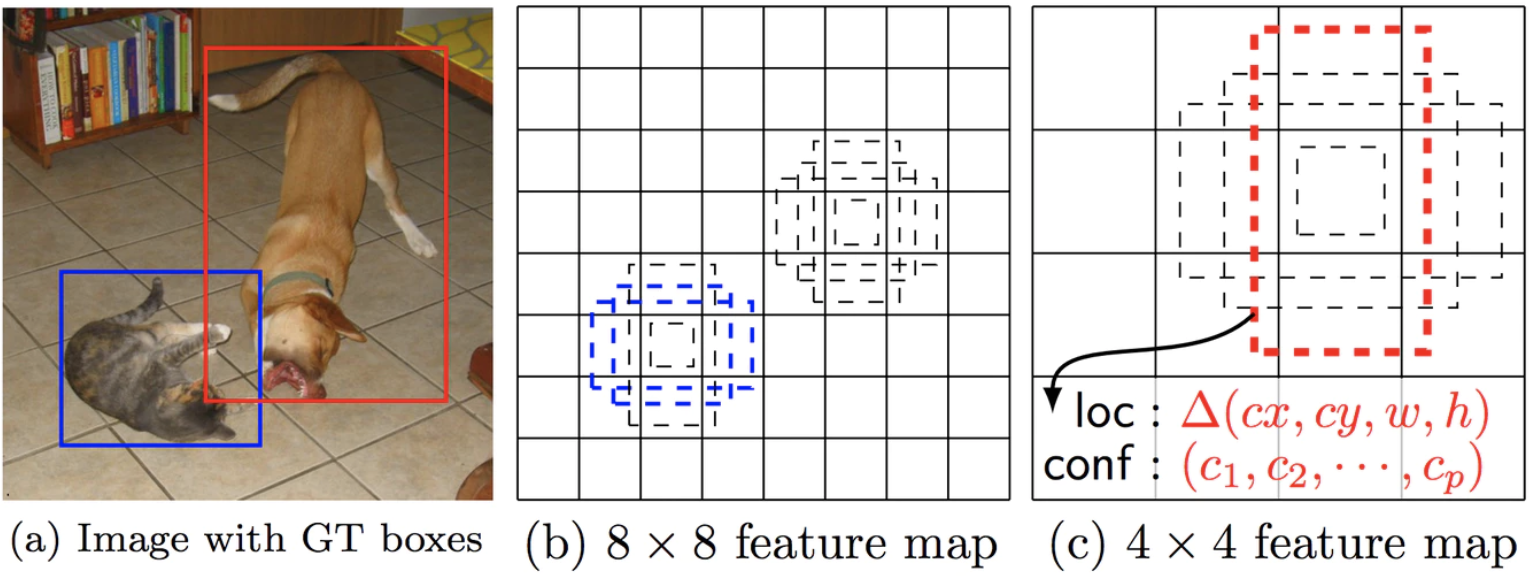

In [ ]:
# Pythonモジュール
import os
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread

# 深層学習用フレームワーク
import tensorflow as tf
from keras.applications.imagenet_utils import preprocess_input
from keras.backend.tensorflow_backend import set_session
from keras.preprocessing import image

# 自作モジュール
from ssd_v2 import SSD300v2
from ssd_utils import BBoxUtility

In [ ]:
# クラス
classes = ['Aeroplane', 'Bicycle', 'Bird', 'Boat', 'Bottle',
               'Bus', 'Car', 'Cat', 'Chair', 'Cow', 'Diningtable',
               'Dog', 'Horse','Motorbike', 'Person', 'Pottedplant',
               'Sheep', 'Sofa', 'Train', 'Tvmonitor']

In [ ]:
# クラス数
num_classes = len(classes)+1
print(num_classes)

In [ ]:
# 入力層の
input_shape=(300, 300, 3)

# モデルを設定するインスタンスを生成
model = SSD300v2(input_shape, num_classes=num_classes)

# 学習済みモデル(hdf5ファイル)の読み込み
model.load_weights('weights_SSD300.hdf5', by_name=True)

# バウンディングボックスを設定するインスタンスを生成
bbox_util = BBoxUtility(num_classes)

In [ ]:
# 画像の読み込み
inputs = []
images = []
img_path = './pics/fish-bike.jpg'
img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img)
images.append(imread(img_path))
inputs.append(img.copy())

img_path = './pics/cat.jpg'
img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img)
images.append(imread(img_path))
inputs.append(img.copy())

img_path = './pics/boys.jpg'
img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img)
images.append(imread(img_path))
inputs.append(img.copy())

img_path = './pics/car_cat.jpg'
img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img)
images.append(imread(img_path))
inputs.append(img.copy())

img_path = './pics/car_cat2.jpg'
img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img)
images.append(imread(img_path))
inputs.append(img.copy())
inputs = preprocess_input(np.array(inputs))

In [ ]:
# 推論を実行
preds = model.predict(inputs, batch_size=1, verbose=1)

In [ ]:
# 結果を取得（ラベル、信頼度、座標）
results = bbox_util.detection_out(preds)

In [ ]:
for i, img in enumerate(images):
    # ラベル、信頼度、座標を代入
    det_label = results[i][:, 0]
    det_conf = results[i][:, 1]
    det_xmin = results[i][:, 2]
    det_ymin = results[i][:, 3]
    det_xmax = results[i][:, 4]
    det_ymax = results[i][:, 5]

    # 信頼度が0.6以上のバウンディングボックスのインデックスを代入
    top_indices = [i for i, conf in enumerate(det_conf) if conf >= 0.6]

    # 信頼度が0.6以上のラベル、信頼度、座標を代入
    top_conf = det_conf[top_indices]
    top_label_indices = det_label[top_indices].tolist()
    top_xmin = det_xmin[top_indices]
    top_ymin = det_ymin[top_indices]
    top_xmax = det_xmax[top_indices]
    top_ymax = det_ymax[top_indices]

    # カラーリストを生成
    colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()
    # 画像の描画
    plt.imshow(img / 255.)
    currentAxis = plt.gca()

    for i in range(top_conf.shape[0]):
        # 座標を割合から値に変換
        xmin = int(round(top_xmin[i] * img.shape[1]))
        ymin = int(round(top_ymin[i] * img.shape[0]))
        xmax = int(round(top_xmax[i] * img.shape[1]))
        ymax = int(round(top_ymax[i] * img.shape[0]))
        # 信頼度
        score = top_conf[i]
        # ラベル
        label = int(top_label_indices[i])
        # ラベル名
        label_name = classes[label-1]
        # テキスト
        display_txt = '{:0.2f}, {}'.format(score, label_name)
        # バウンディングボックスの座標
        coords = (xmin, ymin), xmax-xmin+1, ymax-ymin+1
        # カラー
        color = colors[label]
        # バウンディングボックスの描画
        currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
        # ラベルの描画
        currentAxis.text(xmin, ymin, display_txt, bbox={'facecolor':color, 'alpha':0.5})
        
    # 画像の表示
    plt.show()